In [3]:
import sqlite3

# Connexion à la base de données
conn = sqlite3.connect("../../patients.db")
cursor = conn.cursor()

# Vérifier le nombre de patients par sexe
cursor.execute(
    "SELECT sexe, COUNT(*) FROM Sexe JOIN Patient ON Sexe.id_sex = Patient.sex GROUP BY sexe"
)
sex_count = cursor.fetchall()

# Vérifier le nombre de fumeurs et non-fumeurs
cursor.execute(
    "SELECT fumeur, COUNT(*) FROM Fumeur JOIN Patient ON Fumeur.id_smoker = Patient.smoker GROUP BY fumeur"
)
smoker_count = cursor.fetchall()

# Vérifier les valeurs uniques de régions
cursor.execute("SELECT DISTINCT region FROM Region")
regions = cursor.fetchall()

# Fermeture de la connexion
conn.close()

# Afficher les résultats
print("Count of patients by sex:", sex_count)
print("Count of smokers vs non-smokers:", smoker_count)
print("Unique regions:", regions)

Count of patients by sex: [('female', 662), ('male', 676)]
Count of smokers vs non-smokers: [('no', 1064), ('yes', 274)]
Unique regions: [('southwest',), ('southeast',), ('northwest',), ('northeast',)]


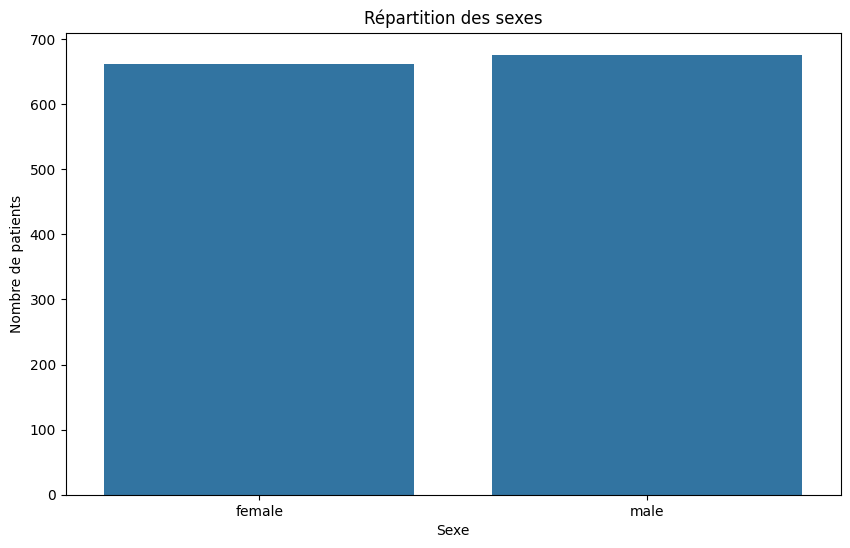

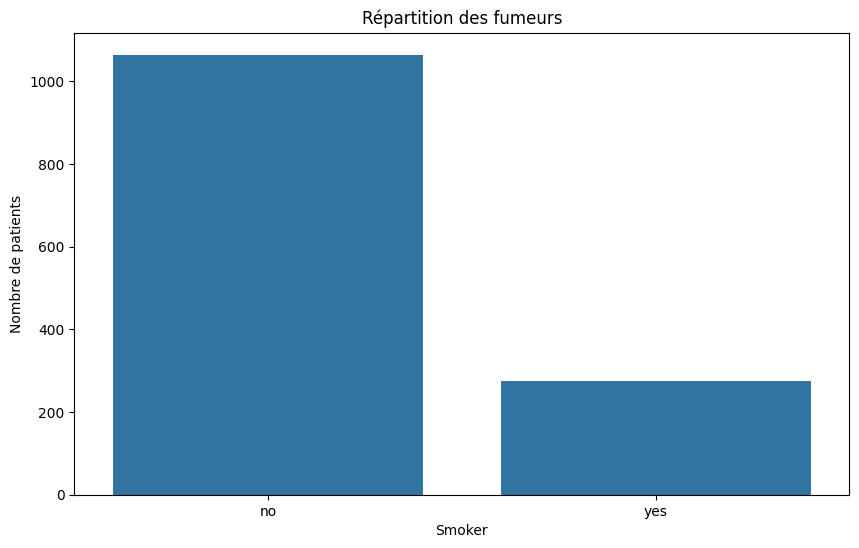

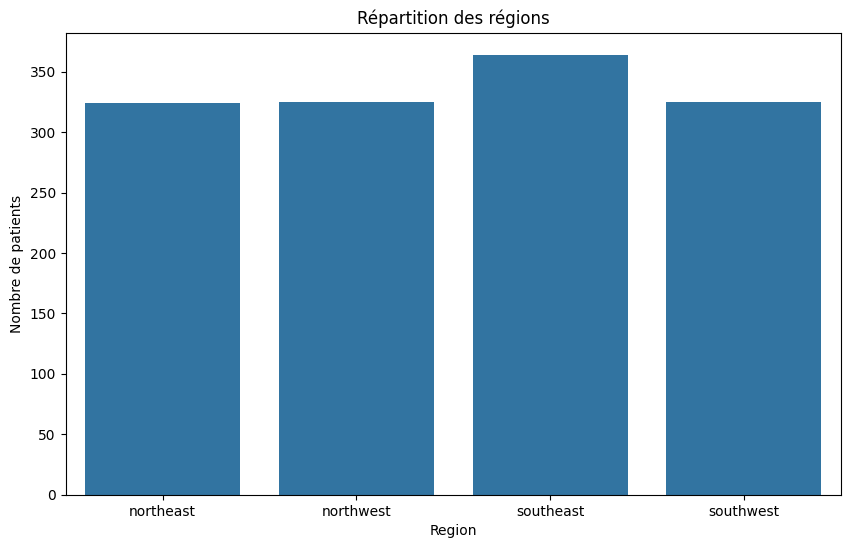

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connexion à la base de données
conn = sqlite3.connect("../../patients.db")
cursor = conn.cursor()

# Charger les données sur le sexe des patients
cursor.execute(
    "SELECT Sexe.sexe, COUNT(*) FROM Sexe JOIN Patient ON Sexe.id_sex = Patient.sex GROUP BY Sexe.sexe"
)
sex_data = cursor.fetchall()

# Charger les données sur le statut de fumeur
cursor.execute(
    "SELECT Fumeur.fumeur, COUNT(*) FROM Fumeur JOIN Patient ON Fumeur.id_smoker = Patient.smoker GROUP BY Fumeur.fumeur"
)
smoker_data = cursor.fetchall()

# Charger les données sur les régions
cursor.execute(
    "SELECT Region.region, COUNT(*) FROM Region JOIN Patient ON Region.id_region = Patient.region GROUP BY Region.region"
)
region_data = cursor.fetchall()

# Convertir en DataFrame pour faciliter l'analyse
df_sex = pd.DataFrame(sex_data, columns=["Sexe", "Count"])
df_smoker = pd.DataFrame(smoker_data, columns=["Smoker", "Count"])
df_region = pd.DataFrame(region_data, columns=["Region", "Count"])

# Visualiser la répartition des sexes
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sex, x="Sexe", y="Count")
plt.title("Répartition des sexes")
plt.ylabel("Nombre de patients")
plt.show()

# Visualiser la répartition des fumeurs
plt.figure(figsize=(10, 6))
sns.barplot(data=df_smoker, x="Smoker", y="Count")
plt.title("Répartition des fumeurs")
plt.ylabel("Nombre de patients")
plt.show()

# Visualiser la répartition des régions
plt.figure(figsize=(10, 6))
sns.barplot(data=df_region, x="Region", y="Count")
plt.title("Répartition des régions")
plt.ylabel("Nombre de patients")
plt.show()

# Fermeture de la connexion
conn.close()